In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/merged_data.csv")
data.head()

,Title,Post ID,Author,URL,Score,Comment Count,Created,Comment Body,Comment Author,Date,1. open,2. high,3. low,4. close,5. volume
0,Elon Musk Leaves Presidential Councils,6epd1s,Litterball,https://twitter.com/elonmusk/status/8703699158...,9711,0,2017-06-01 20:21:23,There is really no point in staying on as an a...,Litterball,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
1,Elon Musk Leaves Presidential Councils,6epd1s,suredoit,https://twitter.com/elonmusk/status/8703699158...,575,0,2017-06-01 20:34:32,I am surprised this isnt on /r/Futurology,suredoit,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
2,Elon Musk Leaves Presidential Councils,6epd1s,RiseoftheTrumpwaffen,https://twitter.com/elonmusk/status/8703699158...,499,0,2017-06-01 20:31:45,I guess all that 'the only way to deal with Tr...,RiseoftheTrumpwaffen,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
3,Elon Musk Leaves Presidential Councils,6epd1s,mirrorsaw,https://twitter.com/elonmusk/status/8703699158...,906,0,2017-06-01 20:10:56,Was there any doubt this man would stick to hi...,mirrorsaw,2017-06-01,344.0,344.88,337.29,340.37,7580447.0
4,Elon Musk Leaves Presidential Councils,6epd1s,jonb3838,https://twitter.com/elonmusk/status/8703699158...,34,0,2017-06-01 23:52:08,Every President wants to leave a stamp on Amer...,jonb3838,2017-06-01,344.0,344.88,337.29,340.37,7580447.0


In [ ]:
data = data[["Title", "Comment Body", "Date", "4. close"]]

In [ ]:
data.rename(columns={'Comment Body':"Body", "4. close":"Price"}, inplace = True)
data.head(2)

,Title,Body,Date,Price
0,Elon Musk Leaves Presidential Councils,There is really no point in staying on as an a...,2017-06-01,340.37
1,Elon Musk Leaves Presidential Councils,I am surprised this isnt on /r/Futurology,2017-06-01,340.37


In [ ]:
data.shape

(36830, 4)

In [ ]:
data.nunique()

Title      707
Body     36417
Date       869
Price      863
dtype: int64

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# SENTIMENT ANALYSIS USING VADAR

sid = SentimentIntensityAnalyzer()

def calculate_sentiment_score(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

data['sentiment_score'] = data['Body'].apply(calculate_sentiment_score)

In [ ]:
data["sentiment_score"].describe()

count    36830.000000
mean         0.106592
std          0.469614
min         -0.997000
25%         -0.128000
50%          0.000000
75%          0.469925
max          0.998800
Name: sentiment_score, dtype: float64

In [ ]:
data['sentiment_score'] = (data['sentiment_score'] + 1) * 5

In [ ]:
data.head()

,Title,Body,Date,Price,sentiment_score
0,Elon Musk Leaves Presidential Councils,There is really no point in staying on as an a...,2017-06-01,340.37,3.2015
1,Elon Musk Leaves Presidential Councils,I am surprised this isnt on /r/Futurology,2017-06-01,340.37,6.1315
2,Elon Musk Leaves Presidential Councils,I guess all that 'the only way to deal with Tr...,2017-06-01,340.37,5.0000
3,Elon Musk Leaves Presidential Councils,Was there any doubt this man would stick to hi...,2017-06-01,340.37,5.0695
4,Elon Musk Leaves Presidential Councils,Every President wants to leave a stamp on Amer...,2017-06-01,340.37,3.0910


In [ ]:
data["sentiment_score"].describe()

count    36830.000000
mean         5.532959
std          2.348071
min          0.015000
25%          4.360000
50%          5.000000
75%          7.349625
max          9.994000
Name: sentiment_score, dtype: float64

In [ ]:
# GROUPING DATA ACCORDING TO THE DATE

data['date'] = pd.to_datetime(data['Date'])

df = data.groupby(data['date'].dt.floor('D')).agg({'sentiment_score': 'mean', 'Price': lambda x: x.mode().values[0]}).reset_index()

In [ ]:
df.head()

,date,sentiment_score,Price
0,2016-11-09,5.317125,190.06
1,2016-11-10,5.463004,185.35
2,2016-11-15,5.000000,183.77
3,2016-11-17,1.467000,188.66
4,2017-05-31,6.454415,341.01


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,sentiment_score,Price
0,2016-11-09,5.317125,190.06
1,2016-11-10,5.463004,185.35
2,2016-11-15,5.000000,183.77
3,2016-11-17,1.467000,188.66
4,2017-05-31,6.454415,341.01


In [ ]:
df.nunique()

date               869
sentiment_score    829
Price              863
dtype: int64

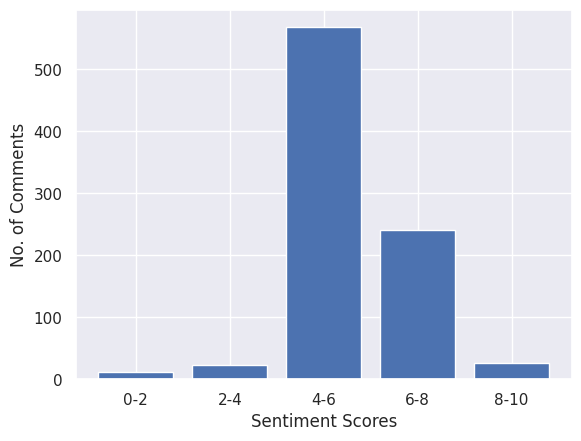

In [ ]:
counts = [sum((score >= i) and (score < i + 2) for score in df['sentiment_score']) for i in range(0, 10, 2)]
plt.bar(["0-2", "2-4", "4-6", "6-8", "8-10"], counts)

plt.xlabel("Sentiment Scores")
plt.ylabel("No. of Comments")

plt.show()

In [ ]:
fig = px.line(df, x='date', y="sentiment_score")
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='SEntiment Reslated to Elon Musks posts'
)
fig.show()

# HIGH VARIANCE


,date,sentiment_score,Price,day_range,month,year,numeric_date,score_difference
0,2016-11-09,5.317125,190.06,0,11,2016,0,NaN
1,2016-11-10,5.463004,185.35,0,11,2016,1,0.145879
2,2016-11-15,5.000000,183.77,1,11,2016,2,0.463004
3,2016-11-17,1.467000,188.66,1,11,2016,3,3.533000
4,2017-05-31,6.454415,341.01,2,5,2017,4,4.987415


In [ ]:
df['score_difference'] = abs(df['sentiment_score'].diff())
df.head()

,date,sentiment_score,Price,day_range,month,year,numeric_date,score_difference
0,2016-11-09,5.317125,190.06,0,11,2016,0,NaN
1,2016-11-10,5.463004,185.35,0,11,2016,1,0.145879
2,2016-11-15,5.000000,183.77,1,11,2016,2,0.463004
3,2016-11-17,1.467000,188.66,1,11,2016,3,3.533000
4,2017-05-31,6.454415,341.01,2,5,2017,4,4.987415


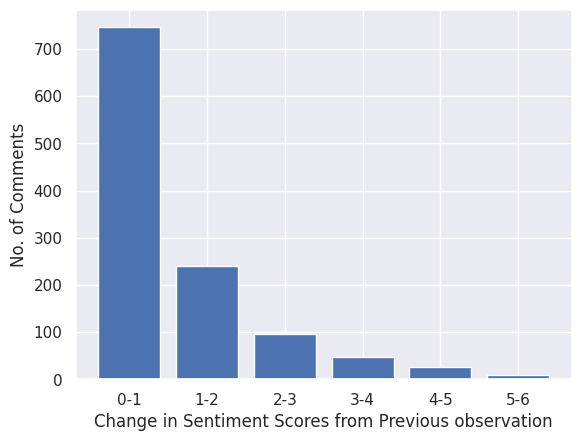

In [ ]:
counts = [sum((score >= i) and (score < i + 2) for score in df['score_difference']) for i in range(0, 6, 1)]
plt.bar(["0-1", "1-2", "2-3", "3-4", "4-5", "5-6"], counts)

plt.xlabel("Change in Sentiment Scores from Previous observation")
plt.ylabel("No. of Comments")

plt.show()

In [ ]:
df["score_difference"].describe()

count    868.000000
mean       1.026379
std        1.062534
min        0.000000
25%        0.302740
50%        0.647833
75%        1.375628
max        5.687000
Name: score_difference, dtype: float64

In [ ]:
# Using plotly.express
import plotly.express as px

fig = px.line(df, x='date', y="Price")
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price of Tesla Stock'
)
fig.show()


Text(0, 0.5, 'Price')

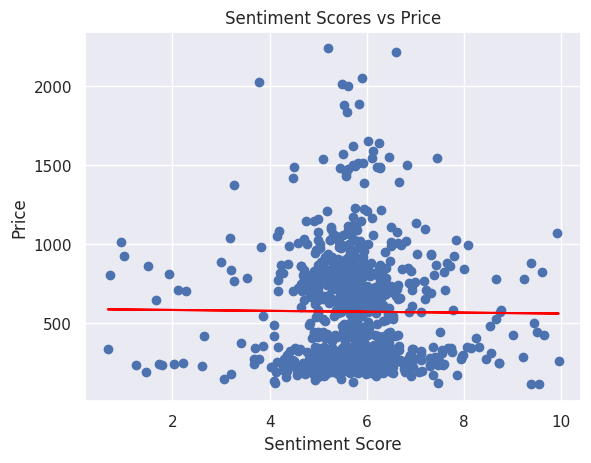

In [ ]:
# PLOT SENTIMENT SCORES VS PRICE

sentiment_scores = df['sentiment_score'].values
prices = df['Price'].values

m, b = np.polyfit(sentiment_scores, prices, 1)

plt.scatter(sentiment_scores, prices)

plt.plot(sentiment_scores, m * sentiment_scores + b, color='red')

plt.title('Sentiment Scores vs Price')
plt.xlabel('Sentiment Score')
plt.ylabel('Price')

In [ ]:
df['numeric_date'] = pd.to_numeric(df.index)

fig = px.scatter(df, x='numeric_date', y="Price", trendline="ols")
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price of Tesla Stock',
    xaxis = dict(showticklabels=False)
)
fig.show()

In [ ]:
df['numeric_date'] = pd.to_numeric(df.index)

fig = px.scatter(df, x='numeric_date', y="sentiment_score", trendline="ols")
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price of Tesla Stock',
    xaxis = dict(showticklabels=False)
)
fig.show()

In [ ]:
# P VALUE TEST TO SEE CORRELATIONS BETWEEN SENTIMENT AND DATE

import scipy.stats as stats

corr, p_value = stats.pearsonr(df['Price'], df['sentiment_score'])

print('Corr. Coefficient:', corr)
print('p-value:', p_value)


Corr. Coefficient: -0.00899548402477813
p-value: 0.7911636955146736


In [ ]:
df.drop({'numeric_date', "score_difference"}, axis = 1, inplace = True)
df.head()

,date,sentiment_score,Price,day_range,month,year
0,2016-11-09,5.317125,190.06,0,11,2016
1,2016-11-10,5.463004,185.35,0,11,2016
2,2016-11-15,5.000000,183.77,1,11,2016
3,2016-11-17,1.467000,188.66,1,11,2016
4,2017-05-31,6.454415,341.01,2,5,2017


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['day_range'] = pd.cut(df['date'].dt.day, bins=[0, 10, 20, 31], labels=['0', '1', '2'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
avg_sentiment = df.groupby('year')['sentiment_score'].mean().reset_index()

fig = px.bar(avg_sentiment, x='year', y='sentiment_score', labels={'year': 'Year', 'sentiment_score': 'Average Sentiment Score'})

fig.update_layout(title='Average Sentiment Score by Year')

In [ ]:
df.head()

,date,sentiment_score,Price,day_range,month,year
0,2016-11-09,5.317125,190.06,0,11,2016
1,2016-11-10,5.463004,185.35,0,11,2016
2,2016-11-15,5.000000,183.77,1,11,2016
3,2016-11-17,1.467000,188.66,1,11,2016
4,2017-05-31,6.454415,341.01,2,5,2017


In [ ]:
df.shape

(869, 6)

In [ ]:
shuffle_data = df.sample(frac = 1)
shuffle_data.head()

,date,sentiment_score,Price,day_range,month,year
813,2023-02-22,5.976500,200.86,2,2,2023
538,2021-03-10,5.688632,668.06,0,3,2021
58,2019-01-16,7.661000,346.05,1,1,2019
175,2019-08-21,4.031250,220.83,2,8,2019
790,2022-11-21,5.110158,167.87,2,11,2022


In [ ]:
shuffle_data = shuffle_data[["sentiment_score", "Price", "day_range", "month", "year"]]

In [ ]:
shuffle_data.head(5)

,sentiment_score,Price,day_range,month,year
373,5.191293,935.28,1,11,2021
529,6.215500,714.50,1,11,2021
353,4.945860,803.33,1,11,2021
853,5.099500,273.58,2,11,2019
441,5.921923,448.16,1,11,2021


In [ ]:
x = df[["sentiment_score", "day_range", "month", "year"]]
y = df[["Price"]]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_preds = dt.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf_preds = rf.predict(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

lr_preds = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

lr_error = mean_absolute_error(lr_preds, y_test)
dt_error = mean_absolute_error(dt_preds, y_test)
rf_error = mean_absolute_error(rf_preds, y_test)

In [ ]:
print(lr_error)
print(dt_error)
print(rf_error)

243.93781666179027
45.201379310344834
43.190924952107196


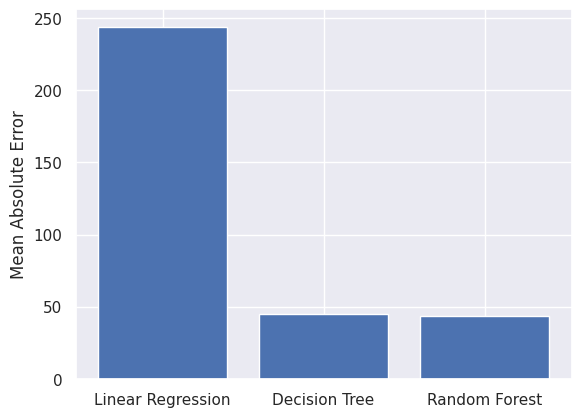

In [ ]:
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [lr_error, dt_error, rf_error])
plt.ylabel('Mean Absolute Error')

plt.show()